In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Задача 7-1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

## Решение:
#### [A] Найдем коэффициенты линейной регрессии с помощью формул для парной регрессии:

###### 1) Запишем уравнение линейной регрессии:
$$\widehat{y} = \beta_0 + \beta_1 \cdot x,$$ где $y$ - значения поведенческого кредитного скоринга заемщиков (ks), $x$ - значения величины заработной платы заемщиков банка (zp)

###### 2) Для парной регрессии коэффициенты вычисляются по формулам:
$$\beta_1 = \frac{\overline{yx} - \overline y \cdot \overline x}{\overline{x^2} - (\overline x)^2}, \: \beta_0 = \overline y - \beta_1 \cdot {\overline x},$$где $x$, $y$ — данные из выборки, а $\overline{x},\:\overline{y}$ обозначают выборочное среднее

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
b_1 = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b_0 = np.mean(ks) - b_1*np.mean(zp)
print(f'Коэффициенты линейной регрессии: 𝛽0 = {round(b_0, 3)}, 𝛽1 = {round(b_1, 3)}')

Коэффициенты линейной регрессии: 𝛽0 = 444.177, 𝛽1 = 2.621


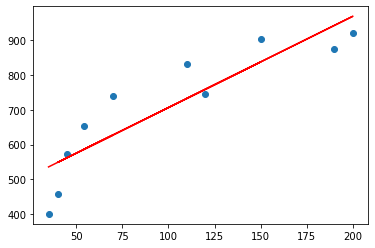

In [3]:
%matplotlib inline
plt.scatter(zp, ks)
ox = zp
oy = b_0+b_1*zp
plt.plot(ox, oy, color='red')
plt.show()

#### [Б] Найдем коэффициенты линейной регрессии матричным методом:
#### а) без интерсепта:
###### 1) Запишем уравнение линейной регрессии без интерсепта:
$$\widehat y = \beta_1 \cdot x,$$ где $y$ - значения поведенческого кредитного скоринга заемщиков (ks), $x$ - значения величины заработной платы заемщиков банка (zp)

###### 2) Вычисление коэффициента $\beta_1$ (без интерсепта) производится с помощью матрицы вида:
$$\begin{pmatrix} y_1 \\ y_2 \\ \vdots\\ y_n \end{pmatrix}=\begin{pmatrix} x_1 \\ x_2 \\ \vdots\\ x_n \end{pmatrix} \bullet \begin{pmatrix} \; \\ \beta_1 \\ \; \\ \; \end{pmatrix}$$

Тогда формула для вычисления коэффициента примет вид:
$$\widehat B = \left(X^T \cdot X\right)^{-1} \cdot X^T \cdot Y,$$ где $\widehat B$ - коэффициент $\beta_1$ уравнения, $X^T$ - транспонированная матрица значений заработной платы заемщиков банка (zp)

In [4]:
#print(dir(np.dot))
#print (np.dot.__doc__)
#print (np.linalg.inv.__doc__)
#print (np.reshape.__doc__)

In [5]:
X = zp.reshape((10,1))
Y = ks.reshape((10,1))
B_1_no_int = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ Y)
print(f'Значения величины заработной платы заемщиков банка (zp):')
print(X)
print(f'Значения поведенческого кредитного скоринга заемщиков (ks):')
print(Y)
print(f'Коэффициент линейной регрессии (без интерсепта): 𝛽1 = {B_1_no_int}')

Значения величины заработной платы заемщиков банка (zp):
[[ 35]
 [ 45]
 [190]
 [200]
 [ 40]
 [ 70]
 [ 54]
 [150]
 [120]
 [110]]
Значения поведенческого кредитного скоринга заемщиков (ks):
[[401]
 [574]
 [874]
 [919]
 [459]
 [739]
 [653]
 [902]
 [746]
 [832]]
Коэффициент линейной регрессии (без интерсепта): 𝛽1 = [[5.88982042]]


#### б) с интерсептом:
###### 1) Запишем уравнение линейной регрессии с интерсептом:
$$\widehat{y} = \beta_0 + \beta_1 \cdot x,$$ где $y$ - значения поведенческого кредитного скоринга заемщиков (ks), $x$ - значения величины заработной платы заемщиков банка (zp)

###### 2) Вычисление коэффициентов $\beta_0$ и $\beta_1$ производится с помощью матрицы вида:
$$\begin{pmatrix} y_1 \\ y_2 \\ \vdots\\ y_n \end{pmatrix}=\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots\\ 1 & x_n \end{pmatrix} \bullet \begin{pmatrix} \; \\ \beta_0 \\ \beta_1 \\ \; \end{pmatrix}$$

Формула для вычисления коэффициентов не меняется и имеет вид:
$$\widehat B = \left(X^T \cdot X\right)^{-1} \cdot X^T \cdot Y,$$ где $\widehat B$ - коэффициент $\beta_1$ уравнения, $X^T$ - транспонированная матрица значений заработной платы заемщиков банка (zp)

In [6]:
X_1 = np.hstack([np.ones((10, 1)), X])
X_1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [7]:
B_w_int = np.dot(np.linalg.inv(np.dot(X_1.T, X_1)), X_1.T @ Y)
print(f'Коэффициенты линейной регрессии (с интерсептом): 𝛽0, 𝛽1 = {B_w_int}')

Коэффициенты линейной регрессии (с интерсептом): 𝛽0, 𝛽1 = [[444.17735732]
 [  2.62053888]]


## Ответ 7-1:
### Уравнение линейной регрессии с найденными коэффициентами:
- без интересепта: $\widehat y = 5.89 x$
- с интерсептом: $\widehat{y} = 444.177 + 2.621 x$

## Задача 7-2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

## Решение:
###### Запишем уравнение линейной регрессии без интерсепта:
$$\widehat y = \beta_1 \cdot x,$$ где $y$ - значения поведенческого кредитного скоринга заемщиков (ks), $x$ - значения величины заработной платы заемщиков банка (zp)

In [8]:
n = len(zp)
B1 = 0.1
alpha = 1e-6
print(f'Скорость обучения: 𝛼 = {alpha}')

Скорость обучения: 𝛼 = 1e-06


In [9]:
def mse_(B1, ks=ks, zp=zp, n=10):
    return np.sum((B1 * zp - ks) ** 2) / n

In [10]:
for i in range (10001):
    B1 -= alpha * (2/n) * np.sum((B1 *zp - ks) * zp)
    if i % 2000==0:
        print('Итерация: {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Итерация: 0, B1 = 0.25952808, mse = 493237.7212546963
Итерация: 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 4000, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 6000, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 8000, B1 = 5.889820420132673, mse = 56516.85841571943
Итерация: 10000, B1 = 5.889820420132673, mse = 56516.85841571943


## Ответ 7-2:
### Коэффициент $\beta_1$ найденный методом градиентного спуска (без интерсепта): $\beta_1 = 5.89$

## Задача 7-3*.
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

## Решение:
###### Запишем уравнение линейной регрессии с интерсептом:
$$\widehat{y} = \beta_0 + \beta_1 \cdot x,$$ где $y$ - значения поведенческого кредитного скоринга заемщиков (ks), $x$ - значения величины заработной платы заемщиков банка (zp)

In [11]:
alpha = 5e-6
print(f'Скорость обучения: 𝛼 = {alpha}')

Скорость обучения: 𝛼 = 5e-06


In [12]:
B0 = 0.1
B1 = 0.1

def mse_(B0, B1, ks=ks, zp=zp, n=10):
    return np.sum((B0 + B1 * zp - ks) ** 2) / n

In [13]:
for i in range (3900001):
    ks_pred = B0 + B1 * zp
    B0 -= alpha * (2/n) * np.sum(ks_pred - ks)
    B1 -= alpha * (2/n) * np.sum((ks_pred - ks) * zp)
    if i % 300000==0:
        print('Итерация: {i}, B0 = {B0}, B1 = {B1}, mse = {mse}'.format(i = i, B0 = B0, B1 = B1, mse = mse_(B0, B1)))

Итерация: 0, B0 = 0.10699660000000001, B1 = 0.8975390000000001, mse = 399736.8945969929
Итерация: 300000, B0 = 236.7158499652068, B1 = 4.147547300567454, mse = 17388.2222155033
Итерация: 600000, B0 = 347.2471366420882, B1 = 3.3339881619365928, mse = 8853.714668002625
Итерация: 900000, B0 = 398.8895938201226, B1 = 2.9538768446643724, mse = 6990.676245326846
Итерация: 1200000, B0 = 423.01799640699176, B1 = 2.7762811338454414, mse = 6583.984688134168
Итерация: 1500000, B0 = 434.291275085185, B1 = 2.693304818571127, mse = 6495.206045311317
Итерация: 1800000, B0 = 439.55837934948744, B1 = 2.6545366024652957, mse = 6475.8261312657405
Итерация: 2100000, B0 = 442.0192772056387, B1 = 2.636423306218581, mse = 6471.595597249101
Итерация: 2400000, B0 = 443.16905855694154, B1 = 2.6279604071254554, mse = 6470.67209376895
Итерация: 2700000, B0 = 443.7062597058993, B1 = 2.6240063691588547, mse = 6470.470497782609
Итерация: 3000000, B0 = 443.95725096967476, B1 = 2.622158962487855, mse = 6470.4264904317

## Ответ 7-3*:
### Коэффициенты $\beta_0$ и $\beta_1$ найденные методом градиентного спуска (с интерсептом): $\beta_0 = 444.155$, $\beta_1 = 2.621$